## Download and plot NASA EARTH Data
**Author:** Ana Vaz based on Eli Holmes (NOAA)</br>
Last updated: Jan 29, 2026

In [1]:
# If running in Colab, uncomment (delete the #) and run this line
!pip install xarray earthaccess cartopy

In [2]:
# import packages
import earthaccess
import xarray as xr

auth = earthaccess.login(persist=True)

results = earthaccess.search_datasets(instrument="MODIS")
for item in results[1:100]:
    summary = item.summary()
    print(summary["short-name"])

Sat_ActiveLayer_Thickness_Maps_1760
ABoVE_MODIS_MAIAC_Reflectance_1858
Wildfires_NWT_Canada_1548
Wildfires_2014_NWT_Canada_1307
Burned_Area_Depth_AK_CA_2063
MODIS_MAIAC_Reflectance_1700
Dall_Sheep_Population_Dynamics_1640
Dall_Sheep_Snowpack_1602
Effect_Environment_Moose_1739
ABoVE_Frac_Open_Water_1362
Snow_Cover_Extent_and_Depth_1757
BurnedArea_Emissions_AK_YT_NWT_1812
Last_Day_Spring_Snow_1528
GPP_MODIS_Alaska_Canada_2024
MODIS_CCaN_NDVI_Trends_Alaska_1666
Albedo_Boreal_North_America_1605
Alaska_Yukon_NDVI_1614
NorthSlope_NEE_TVPRM_1920
Wildfires_Date_of_Burning_1559
Wolves_Denning_Pups_Climate_1846
AGB_Pantropics_Amazon_Mexico_1824
ACTIVATE-MODIS-MERRA2
ADAM.Surface.Reflectance.Database
CIESIN_AfSIS_MODIS_ALB2012
CIESIN_AfSIS_MODIS_LCT2012
CIESIN_AfSIS_MODIS_LST201404
CIESIN_AfSIS_MODIS_LAIFPAR2012
CIESIN_AfSIS_MODIS_PP2012
CIESIN_AfSIS_MODIS_VEGIN201404
aad_ais_gz_modis_slope_break
AMDBLWV
AMDBLWV
AMMBLWV
AMMBLWV
NSIDC-0432
UNIZH_AGREG
CIESIN_SEDAC_SDEI_APM25_URBAN
CMS_WFEIS_CONUS-

In [3]:
results = earthaccess.search_data(
    short_name = 'MODISA_L3m_SST',
    temporal = ("2025-03-05", "2025-03-05")
)
len(results)
results

[Collection: {'Version': 'R2019.0', 'ShortName': 'MODISA_L3m_SST'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180, 'SouthBoundingCoordinate': -90, 'NorthBoundingCoordinate': 90, 'EastBoundingCoordinate': 180}]}}}
 Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2025-03-31T23:59:59Z', 'BeginningDateTime': '2002-07-04T00:00:00Z'}}
 Size(MB): 23.255444526672363
 Data: ['https://oceandata.sci.gsfc.nasa.gov/cmr/getfile/AQUA_MODIS.20020704_20250331.L3m.CU.SST.sst.4km.nc'],
 Collection: {'Version': 'R2019.0', 'ShortName': 'MODISA_L3m_SST'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'SouthBoundingCoordinate': -90, 'WestBoundingCoordinate': -180, 'EastBoundingCoordinate': 180, 'NorthBoundingCoordinate': 90}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2002-07-04T00:00:00Z', 'EndingDateTime': '2025-03-31T23:59:59Z'}}
 Size(MB): 7.116772651672363
 Data: ['htt

In [4]:
# Importar pacotes
import earthaccess

# Autenticar no NASA Earthdata
auth = earthaccess.login(persist=True)

# Dados do MODIS Aqua - Temperatura da Superfície do Mar (SST)
results = earthaccess.search_data(
    short_name='MODISA_L3m_SST',  # Certifique-se do nome
    temporal=("2025-01-01", "2025-01-31"),  # Teste um intervalo de datas
)

# Verifique o tamanho e o link dos resultados
print(len(results))  # Para ver quantos resultados foram encontrados


140


In [5]:
# import packages
import earthaccess
import xarray as xr

#authenticate NASA Earthdata
auth = earthaccess.login(persist=True)

# Level 3 data for sst
# Bounding box 
# bounding_box = (lon_min, lat_min, lon_max, lat_max)
results = earthaccess.search_data(
   # short_name = 'MODISA_L3m_SST',
    short_name = 'MODIS_AQUA_L3_SST_THERMAL_DAILY_4KM_DAYTIME_V2019.0',
   # granule_name="*.DAY.*.4km.*",
    temporal = ("2025-02-22", "2025-02-22"),
    bounding_box = (-77, 35, -71.5, 41.0)
)

#look at size and the link for results
len(results)
results[0]

#MODIS_AQUA_L3_SST_THERMAL_DAILY_4KM_DAYTIME_V2019.0

Collection: {'Version': '2019.0', 'ShortName': 'MODIS_AQUA_L3_SST_THERMAL_DAILY_4KM_DAYTIME_V2019.0'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180, 'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'NorthBoundingCoordinate': 90}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2025-02-22T02:19:59.000Z', 'BeginningDateTime': '2025-02-21T00:00:01.000Z'}}
Size(MB): 9.176929473876953
Data: ['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MODIS_AQUA_L3_SST_THERMAL_DAILY_4KM_DAYTIME_V2019.0/AQUA_MODIS.20250221.L3m.DAY.SST.sst.4km.NRT.nc']

In [6]:

# set a file pointer : We use earthaccess’s open() method to 
# create a ‘fileset’ to the cloud objects with the info needed 
# to open data in cloud buckets
fileset = earthaccess.open(results)

# Step 2 Read the file using `xarray.open_dataset()`
# We can load the information about the data and look at 
# its properties without actually loading all the data into memory.
# Open with xarray
import xarray as xr
ds = xr.open_dataset(fileset[0], chunks={})
ds

QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

<xarray.Dataset> Size: 299MB
Dimensions:   (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon       (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (lat, lon) float32 149MB dask.array<chunksize=(512, 1024), meta=np.ndarray>
    qual_sst  (lat, lon) float32 149MB dask.array<chunksize=(512, 1024), meta=np.ndarray>
    palette   (rgb, eightbitcolor) uint8 768B dask.array<chunksize=(3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20250221.L3m.DAY.SST.sst.4km...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Optics >...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        5998640
    data_minimum:                     -1.8000001
    data_maximum:                     39.89

#### Open the data set 

In [7]:
# Import pandas
import pandas as pd

# Read the CSV file
# The file path in your Jupyter notebook environment is:
obs = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/OBIS_NEFSC_offshore_obs.csv')

# Take a quick look at the data
print(f"Total observations: {len(obs)}")
print("\nFirst few rows:")
obs.head()

Total observations: 121

First few rows:


,dataset_id,row_id,latitude,longitude,species_name,scientific_name,common_name,itis_tsn,group_size,series_id,...,edit1,edit2,edit3,misc_edit1,misc_edit2,misc_edit3,misc_edit4,rid,event_t,datetime_et
0,2368,2368_10,37.14515,-74.54101,FIWH,Balaenoptera physalus,Fin whale,180527,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5037879,NaN,28-DEC-24 11.33.07.000000000 AM
1,2368,2368_106,38.31930,-73.84825,FIWH,Balaenoptera physalus,Fin whale,180527,1,NaN,...,sigcom from unlw,NaN,NaN,NaN,NaN,NaN,NaN,5074256,NaN,22-FEB-25 02.46.46.000000000 PM
2,2368,2368_107,38.31815,-73.85002,FIWH,Balaenoptera physalus,Fin whale,180527,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5074280,NaN,22-FEB-25 02.50.02.000000000 PM
3,2368,2368_108,38.30965,-73.82714,HUWH,Megaptera novaeangliae,Humpback whale,180530,2,NaN,...,sigcom from unlw,NaN,NaN,NaN,NaN,NaN,NaN,5074289,NaN,22-FEB-25 02.50.41.000000000 PM
4,2368,2368_109,38.80395,-72.99513,HUWH,Megaptera novaeangliae,Humpback whale,180530,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5082566,NaN,26-FEB-25 11.45.26.000000000 AM


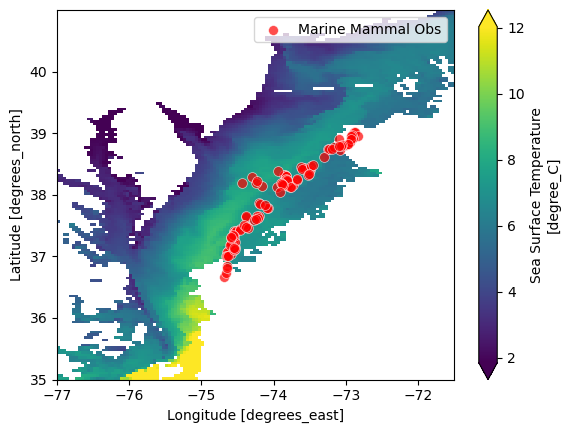

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

sst = ds['sst']
sst_sub = sst.sel(
    lat=slice(41.0, 35),
    lon=slice(-77.0, -71.5)
)

# Plot SST
sst_sub.plot(robust=True)

# Get the current axes and add scatter points
ax = plt.gca()  # "get current axes"
ax.scatter(obs['longitude'], 
          obs['latitude'],
          c='red',
          s=50,
          alpha=0.7,
          edgecolors='white',
          linewidths=0.5,
          label='Marine Mammal Obs')

ax.legend()
plt.show()

### look at datasets

The plot above is for a single day, and that's not really anything we can work with for the full dataset which extends from Dec 28 to March 28. So we will need to look through to extract the appropriate data. 

We are leveraging the 3x3 section of code (though it is modified here to fit our use case) from the "matchups.ipynb." 1. What is the 3x3 box? A 3x3 pixel box means extracting 9 pixels (3×3 grid) centered on your observation point. This helps:

- Reduce noise from individual bad pixels (clouds, glint, etc.)
- Account for spatial uncertainty in the whale's exact position
- Better represent the environment the whale is actually experiencing (they move through a patch, not a single point) 


In [9]:
import earthaccess
import xarray as xr
import pandas as pd
import numpy as np
from tqdm import tqdm

# Read your observations
obs = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/OBIS_NEFSC_offshore_obs.csv')

# Convert date_time to datetime
obs['date'] = pd.to_datetime(obs['date_time']).dt.date
obs['date'] = pd.to_datetime(obs['date'])

# Get unique dates
unique_dates = obs['date'].unique()
print(f"Found {len(unique_dates)} unique observation dates")
print(f"Date range: {obs['date'].min()} to {obs['date'].max()}")

# Login to earthaccess
auth = earthaccess.login()

# Define your bounding box (lon_min, lat_min, lon_max, lat_max)
bounding_box = (-77.0, 35.5, -71.5, 41.0)

results_list = []

# Loop through unique dates
for date in tqdm(unique_dates, desc="Processing unique dates"):
    
    # For DAILY data, search +/- 1 day to handle missing data
    start = (date - pd.Timedelta(days=1)).strftime("%Y-%m-%d")
    end = (date + pd.Timedelta(days=1)).strftime("%Y-%m-%d")
    
    try:
        results = earthaccess.search_data(
            short_name='MODIS_AQUA_L3_SST_THERMAL_DAILY_4KM_DAYTIME_V2019.0',
            temporal=(start, end),
            # NO granule_name filter for MODIS L3 mapped products
            bounding_box=bounding_box
        )
        
        if not results:
            print(f"No SST data found for {date}")
            continue
        
        # Open the files
        fileset = earthaccess.open(results)
        
        for ea_file in fileset:
            with xr.open_dataset(ea_file, engine="h5netcdf") as ds:
                
                # Debug: Check what variables are available
                if len(results_list) == 0:  # Print once
                    print(f"\nAvailable variables in dataset: {list(ds.data_vars)}")
                    print(f"Coordinates: {list(ds.coords)}")
                
                # Get observations for this date
                points_today = obs[obs['date'] == date]
                
                # Get coordinate arrays
                lat_vals = ds.lat.values
                lon_vals = ds.lon.values
                
                # Determine SST variable name (try common options)
                if 'sst' in ds.data_vars:
                    sst_var = 'sst'
                elif 'sea_surface_temperature' in ds.data_vars:
                    sst_var = 'sea_surface_temperature'
                elif 'SST' in ds.data_vars:
                    sst_var = 'SST'
                else:
                    print(f"Warning: SST variable not found. Available: {list(ds.data_vars)}")
                    continue
                
                print(f"Using SST variable: '{sst_var}'")
                
                for idx, row in tqdm(points_today.iterrows(), 
                                    total=len(points_today), 
                                    desc=f"Points on {date.date()}", 
                                    leave=False):
                    
                    lat_center = row['latitude']
                    lon_center = row['longitude']
                    
                    # Find nearest indices for 3x3 box
                    lat_idx = np.abs(lat_vals - lat_center).argmin()
                    lon_idx = np.abs(lon_vals - lon_center).argmin()
                    
                    lat_slice = slice(max(lat_idx-1, 0), min(lat_idx+2, len(lat_vals)))
                    lon_slice = slice(max(lon_idx-1, 0), min(lon_idx+2, len(lon_vals)))
                    
                    # Extract SST from 3x3 box
                    sst_box = ds[sst_var].isel(lat=lat_slice, lon=lon_slice)
                    
                    # Calculate statistics
                    result_row = {
                        'Original_Index': idx,
                        'latitude': lat_center,
                        'longitude': lon_center,
                        'date_time': row['date_time'],
                        'date': date,
                        'common_name': row['common_name'],
                        'scientific_name': row['scientific_name'],
                        'group_size': row['group_size'],
                        'sst_mean': float(sst_box.mean(skipna=True).values),
                        'sst_median': float(sst_box.median(skipna=True).values),
                        'sst_std': float(sst_box.std(skipna=True).values),
                        'sst_min': float(sst_box.min(skipna=True).values),
                        'sst_max': float(sst_box.max(skipna=True).values),
                        'sst_q25': float(sst_box.quantile(0.25, skipna=True).values),
                        'sst_q75': float(sst_box.quantile(0.75, skipna=True).values)
                    }
                    results_list.append(result_row)
                    
    except Exception as e:
        print(f"Error processing {date}: {e}")
        continue

# Save results
if results_list:
    final_df = pd.DataFrame(results_list)
    output_file = "/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_SST.csv"
    final_df.to_csv(output_file, index=False)
    print(f"\nCSV saved: {output_file}")
    print(f"Total matched observations: {len(final_df)}")
    
    # Display summary statistics
    print("\n=== SST Summary by Species ===")
    print(final_df.groupby('common_name')['sst_median'].describe())
    
    # Check for missing data
    print(f"\nObservations with missing SST: {final_df['sst_median'].isnull().sum()}")
else:
    print("No SST data extracted.")

Found 19 unique observation dates
Date range: 2024-12-28 00:00:00 to 2025-03-28 00:00:00


Processing unique dates:   0%|          | 0/19 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]


Available variables in dataset: ['sst', 'qual_sst', 'palette']
Coordinates: ['lat', 'lon']
Using SST variable: 'sst'



Points on 2024-12-28:   0%|          | 0/2 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                           

Using SST variable: 'sst'



Points on 2024-12-28:   0%|          | 0/2 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                           

Using SST variable: 'sst'



Points on 2024-12-28:   0%|          | 0/2 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                           

Using SST variable: 'sst'



Points on 2024-12-28:   0%|          | 0/2 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                           

Using SST variable: 'sst'



Points on 2024-12-28:   0%|          | 0/2 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                           

Using SST variable: 'sst'



Points on 2024-12-28:   0%|          | 0/2 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                           

Using SST variable: 'sst'



Points on 2024-12-28:   0%|          | 0/2 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Processing unique dates:   5%|▌         | 1/19 [00:07<02:12,  7.34s/it]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Using SST variable: 'sst'



Points on 2025-02-22:   0%|          | 0/16 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, d

Using SST variable: 'sst'



Points on 2025-02-22:   0%|          | 0/16 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, d

Using SST variable: 'sst'



Points on 2025-02-22:  94%|█████████▍| 15/16 [00:00<00:00, 145.93it/s]
                                                                      

Using SST variable: 'sst'



Points on 2025-02-22:  75%|███████▌  | 12/16 [00:00<00:00, 114.26it/s]
                                                                      

Using SST variable: 'sst'



Points on 2025-02-22:   0%|          | 0/16 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, d

Using SST variable: 'sst'



Points on 2025-02-22:   0%|          | 0/16 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, d

Using SST variable: 'sst'



Points on 2025-02-22:  94%|█████████▍| 15/16 [00:00<00:00, 144.79it/s]
                                                                      

Using SST variable: 'sst'



Processing unique dates:  11%|█         | 2/19 [00:12<01:42,  6.02s/it][A

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Using SST variable: 'sst'



Points on 2025-02-26:   0%|          | 0/7 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-26:   0%|          | 0/7 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-26:   0%|          | 0/7 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-26:   0%|          | 0/7 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-26:   0%|          | 0/7 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-26:   0%|          | 0/7 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-26:   0%|          | 0/7 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-02-26:   0%|          | 0/7 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Using SST variable: 'sst'



Points on 2025-02-23:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-23:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-23:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-23:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-23:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-23:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-23:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Processing unique dates:  21%|██        | 4/19 [00:19<01:03,  4.24s/it]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Using SST variable: 'sst'



Points on 2025-02-24:   0%|          | 0/8 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-24:   0%|          | 0/8 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-24:   0%|          | 0/8 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-24:   0%|          | 0/8 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-24:   0%|          | 0/8 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-24:   0%|          | 0/8 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-24:   0%|          | 0/8 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Processing unique dates:  26%|██▋       | 5/19 [00:21<00:48,  3.43s/it]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Using SST variable: 'sst'



Points on 2025-02-18:   0%|          | 0/2 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                           

Using SST variable: 'sst'



Points on 2025-02-18:   0%|          | 0/2 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                           

Using SST variable: 'sst'



Points on 2025-02-18:   0%|          | 0/2 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-18:   0%|          | 0/2 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-18:   0%|          | 0/2 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                           

Using SST variable: 'sst'



Points on 2025-02-18:   0%|          | 0/2 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                           

Using SST variable: 'sst'



Points on 2025-02-18:   0%|          | 0/2 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                           

Using SST variable: 'sst'



Points on 2025-02-18:   0%|          | 0/2 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

Processing unique dates:  32%|███▏      | 6/19 [00:26<00:49,  3.80s/it]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Using SST variable: 'sst'



Points on 2025-02-25:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-25:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-25:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-25:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-02-25:   0%|          | 0/9 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-02-25:   0%|          | 0/9 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-02-25:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Processing unique dates:  37%|███▋      | 7/19 [00:28<00:38,  3.25s/it]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Using SST variable: 'sst'



Points on 2025-03-03:   0%|          | 0/1 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-03:   0%|          | 0/1 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-03:   0%|          | 0/1 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-03:   0%|          | 0/1 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-03:   0%|          | 0/1 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-03:   0%|          | 0/1 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-03:   0%|          | 0/1 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                           

Using SST variable: 'sst'



Points on 2025-03-03:   0%|          | 0/1 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

Processing unique dates:  42%|████▏     | 8/19 [00:32<00:39,  3.62s/it]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Using SST variable: 'sst'



Points on 2025-01-24:   0%|          | 0/5 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-01-24:   0%|          | 0/5 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-01-24:   0%|          | 0/5 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-01-24:   0%|          | 0/5 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-01-24:   0%|          | 0/5 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-01-24:   0%|          | 0/5 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-01-24:   0%|          | 0/5 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Processing unique dates:  47%|████▋     | 9/19 [00:37<00:40,  4.00s/it]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Using SST variable: 'sst'



Points on 2025-01-27:   0%|          | 0/6 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-01-27:   0%|          | 0/6 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-01-27:   0%|          | 0/6 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-01-27:   0%|          | 0/6 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-01-27:   0%|          | 0/6 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-01-27:   0%|          | 0/6 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-01-27:   0%|          | 0/6 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-01-27:   0%|          | 0/6 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Using SST variable: 'sst'



Points on 2025-01-25:   0%|          | 0/8 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-01-25:   0%|          | 0/8 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-01-25:   0%|          | 0/8 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-01-25:   0%|          | 0/8 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-01-25:   0%|          | 0/8 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-01-25:   0%|          | 0/8 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-01-25:   0%|          | 0/8 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Processing unique dates:  58%|█████▊    | 11/19 [00:43<00:27,  3.43s/it]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Using SST variable: 'sst'



Points on 2025-03-19:   0%|          | 0/3 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-03-19:   0%|          | 0/3 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-03-19:   0%|          | 0/3 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-19:   0%|          | 0/3 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-19:   0%|          | 0/3 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-19:   0%|          | 0/3 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-19:   0%|          | 0/3 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Processing unique dates:  63%|██████▎   | 12/19 [00:49<00:28,  4.12s/it]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Using SST variable: 'sst'



Points on 2025-03-25:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-25:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-25:   0%|          | 0/9 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-03-25:   0%|          | 0/9 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, dd

Using SST variable: 'sst'



Points on 2025-03-25:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-25:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-25:   0%|          | 0/9 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Processing unique dates:  68%|██████▊   | 13/19 [00:55<00:27,  4.66s/it]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

Using SST variable: 'sst'



Points on 2025-03-28:   0%|          | 0/6 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-28:   0%|          | 0/6 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-28:   0%|          | 0/6 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Points on 2025-03-28:   0%|          | 0/6 [00:00<?, ?it/s]
                                                           

Using SST variable: 'sst'



Processing unique dates:  68%|██████▊   | 13/19 [00:58<00:26,  4.47s/it]


KeyboardInterrupt: 

Next we get to plot the time series data yay!
We are also going to put together another few figures for dataset - as well as summary stats table. 


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Make sure we have the data
if results_list:
    final_df['date'] = pd.to_datetime(final_df['date'])
    
    # Set up the plotting style
    sns.set_style("whitegrid")

# Make sure we have the data
if results_list:
    final_df['date'] = pd.to_datetime(final_df['date'])
    
    # Set up the plotting style
    sns.set_style("whitegrid")
    
    # ===== PLOT 1: Time Series by Species =====
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Plot each species with median values
    for species in final_df['common_name'].unique():
        species_data = final_df[final_df['common_name'] == species].copy()
        species_data = species_data.sort_values('date')
        
        ax.plot(species_data['date'], 
                species_data['sst_median'], 
                'o-', 
                label=species, 
                alpha=0.7,
                markersize=6,
                linewidth=2)
    
    ax.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax.set_ylabel('SST (C)', fontsize=12, fontweight='bold')
    ax.set_title('SST at Marine Mammal Observation Locations (Median)', 
                 fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/SST_timeseries.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ===== PLOT 2: Box and Whisker Plot by Species =====
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Create box plot using median values
    species_order = final_df['common_name'].value_counts().index.tolist()
    
    bp = ax.boxplot([final_df[final_df['common_name'] == species]['sst_median'].dropna() 
                      for species in species_order],
                     labels=species_order,
                     patch_artist=True,
                     showmeans=True,
                     meanprops=dict(marker='D', markerfacecolor='red', markersize=8))
    
    # Color the boxes
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_xlabel('Species', fontsize=12, fontweight='bold')
    ax.set_ylabel('SST (C)', fontsize=12, fontweight='bold')
    ax.set_title('SST Distribution by Species\n(Box: IQR, Red Diamond: Mean, Line: Median)', 
                 fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/SST_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ===== PLOT 3: Alternative Violin Plot (shows distribution better) =====
    fig, ax = plt.subplots(figsize=(10, 7))
    
    sns.violinplot(data=final_df, 
                   x='common_name', 
                   y='sst_median',
                   palette='Set2',
                   ax=ax)
    
    # Add individual points
    sns.stripplot(data=final_df, 
                  x='common_name', 
                  y='sst_median',
                  color='black',
                  alpha=0.3,
                  size=3,
                  ax=ax)
    
    ax.set_xlabel('Species', fontsize=12, fontweight='bold')
    ax.set_ylabel('SST (C)', fontsize=12, fontweight='bold')
    ax.set_title('SST Distribution by Species (Violin Plot)', 
                 fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/sst_violinplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ===== PLOT 4: Summary Statistics Table =====
    print("\n=== SST Statistics by Species ===")
    summary = final_df.groupby('common_name')['sst_median'].agg([
        ('Count', 'count'),
        ('Mean', 'mean'),
        ('Median', 'median'),
        ('Std Dev', 'std'),
        ('Min', 'min'),
        ('Max', 'max'),
        ('25%', lambda x: x.quantile(0.25)),
        ('75%', lambda x: x.quantile(0.75))
    ]).round(3)
    print(summary)
    
    # Save summary to CSV
    summary.to_csv('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/SST_summary_stats.csv')
    
else:
    print("No data to plot.")

Lets do a correlation between the values of SST and the group size of each observation. And also box plot for the group size values to see if anything there. 

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Load your data
final_df = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_SST.csv')

# Remove any NaN values in group_size or SST
analysis_df = final_df[['common_name', 'group_size', 'sst_median']].dropna()

# Remove any observations with group_size = 0 if they exist
analysis_df = analysis_df[analysis_df['group_size'] > 0]

print(f"Total observations for analysis: {len(analysis_df)}")
print(f"Species found: {analysis_df['common_name'].unique()}")

# ===== STATISTICAL ANALYSIS: CORRELATION BY SPECIES =====
print("\n" + "="*70)
print("CORRELATION ANALYSIS: Group Size vs SST")
print("="*70)

correlation_results = []

species_list = analysis_df['common_name'].unique()

for species in species_list:
    species_data = analysis_df[analysis_df['common_name'] == species]
    
    if len(species_data) > 2:
        # Pearson correlation (linear relationship)
        pearson_r, pearson_p = stats.pearsonr(species_data['group_size'], 
                                               species_data['sst_median'])
        
        # Spearman correlation (monotonic relationship, more robust for discrete data)
        spearman_r, spearman_p = stats.spearmanr(species_data['group_size'], 
                                                  species_data['sst_a_median'])
        
        print(f"\n{species} (n={len(species_data)})")
        print("-" * 50)
        print(f"  Pearson correlation:  r = {pearson_r:.3f}, p-value = {pearson_p:.4f}")
        print(f"  Spearman correlation: ρ = {spearman_r:.3f}, p-value = {spearman_p:.4f}")
        
        # Interpretation
        if spearman_p < 0.05:  # Use Spearman for discrete data
            direction = "positive" if spearman_r > 0 else "negative"
            print(f"  → Significant {direction} correlation (p < 0.05)")
        else:
            print(f"  → No significant correlation (p ≥ 0.05)")
        
        correlation_results.append({
            'Species': species,
            'N': len(species_data),
            'Pearson_r': pearson_r,
            'Pearson_p': pearson_p,
            'Spearman_rho': spearman_r,
            'Spearman_p': spearman_p
        })

# Save correlation results
if correlation_results:
    corr_df = pd.DataFrame(correlation_results)
    corr_df.to_csv('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/groupsize_sst_correlations.csv', 
                   index=False)
    print("\n" + "="*70)
    print("Correlation results saved to groupsize_sst_correlations.csv")
    print("="*70)

# ===== PLOT 1: Box Plot by Species =====
fig, ax = plt.subplots(figsize=(10, 7))

# Create box plot by species
species_order = analysis_df['common_name'].value_counts().index.tolist()

bp = ax.boxplot([analysis_df[analysis_df['common_name'] == species]['sst_median'].dropna() 
                  for species in species_order],
                 labels=species_order,
                 patch_artist=True,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel('Species', fontsize=12, fontweight='bold')
ax.set_ylabel('SST (C)', fontsize=12, fontweight='bold')
ax.set_title('SST Distribution by Species\n(Box: IQR, Red Diamond: Mean, Line: Median)', 
             fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/sst_by_species_boxplot.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# ===== PLOT 2: Box Plot by Group Size Category and Species =====
# Bin group sizes into categories
analysis_df['group_size_category'] = pd.cut(analysis_df['group_size'], 
                                             bins=[0, 1, 2, 4, 100],
                                             labels=['1', '2', '3-4', '5+'])

fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(data=analysis_df, 
            x='group_size_category', 
            y='sst_a_median',
            hue='common_name',
            palette='Set2',
            ax=ax)

ax.set_xlabel('Group Size Category', fontsize=12, fontweight='bold')
ax.set_ylabel('SST (C)', fontsize=12, fontweight='bold')
ax.set_title('SST by Group Size Category and Species', fontsize=14, fontweight='bold')
ax.legend(title='Species', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/groupsize_categories_sst.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nAll plots saved successfully!")

## 3.Environmental Niche Comparison
The Environmental Niche Comparison quantifies whether different marine mammal species occupy distinct ecological niches by comparing the environmental conditions (sst, sst variability, and geographic location) at observation sites. The analysis produces distribution histograms showing the frequency of observations across environmental gradients for each species, statistical tests (Kruskal-Wallis) to determine if species differ significantly in their habitat use, and niche overlap metrics (Pianka's index, 0-1 scale) that quantify how much species' environmental preferences overlap. High niche overlap (>0.7) suggests species are ecological generalists using similar habitats and may compete for resources, while low overlap (<0.4) indicates niche partitioning where species specialize in different conditions, reducing competition. The environmental space plots reveal whether species cluster in different regions of sst-latitude space, indicating habitat specialization, or if they overlap broadly, suggesting opportunistic habitat use. This analysis directly addresses whether marine mammal species in your study area are responding to environmental gradients in species-specific ways (requiring separate conservation strategies) or if they function as a generalized "marine mammal community" with similar habitat requirements (allowing for unified management approaches). The results provide the ecological justification for whether subsequent analyses should be species-specific or can be conducted on pooled data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load your data
df = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_sst.csv')

# Clean data
df_clean = df[['common_name', 'latitude', 'longitude', 
               'sst_median', 'sst_std']].dropna()

print("="*70)
print("ENVIRONMENTAL NICHE ANALYSIS")
print("="*70)

# Summary statistics by species
print("\nSST Conditions by Species:")
summary = df_clean.groupby('common_name').agg({
    'sst_median': ['count', 'mean', 'std', 'min', 'max'],
    'sst_std': ['mean', 'std'],
    'latitude': ['mean', 'std'],
    'longitude': ['mean', 'std']
}).round(3)

print(summary)

# ===== VISUALIZATION 1: Multi-panel Environmental Comparison =====
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

species_list = df_clean['common_name'].unique()
colors = sns.color_palette("Set2", len(species_list))

# Panel 1: SST Distribution
ax1 = axes[0, 0]
for species, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == species]['sst_median']
    ax1.hist(data, alpha=0.6, label=species, bins=15, color=color, edgecolor='black')
ax1.set_xlabel(SST (C)', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('SST Concentration', fontweight='bold', fontsize=13)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Panel 2: SST Variability
ax2 = axes[0, 1]
for species, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == species]['sst_std']
    ax2.hist(data, alpha=0.6, label=species, bins=15, color=color, edgecolor='black')
ax2.set_xlabel('SST Std Dev (mg/m³)', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('SST Variability (Patchiness)', fontweight='bold', fontsize=13)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Panel 3: Latitude Distribution
ax3 = axes[1, 0]
for species, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == species]['latitude']
    ax3.hist(data, alpha=0.6, label=species, bins=15, color=color, edgecolor='black')
ax3.set_xlabel('Latitude (°N)', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('Geographic Distribution (North-South)', fontweight='bold', fontsize=13)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Panel 4: 2D Environmental Space
ax4 = axes[1, 1]
for species, color in zip(species_list, colors):
    species_data = df_clean[df_clean['common_name'] == species]
    ax4.scatter(species_data['sst_median'], 
                species_data['latitude'],
                alpha=0.6, s=50, label=species, color=color,
                edgecolors='black', linewidths=0.5)
ax4.set_xlabel(SST (C)', fontweight='bold')
ax4.set_ylabel('Latitude (°N)', fontweight='bold')
ax4.set_title('Environmental Space Occupation', fontweight='bold', fontsize=13)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Environmental_Niche_Comparison.png',
            dpi=300, bbox_inches='tight')
plt.show()

# ===== STATISTICAL TESTS: Do species differ in habitat use? =====
print("\n" + "="*70)
print("STATISTICAL COMPARISON: Do species use different habitats?")
print("="*70)

# Kruskal-Wallis test (non-parametric ANOVA)
from scipy.stats import kruskal

# Test for SST
groups_sst = [df_clean[df_clean['common_name'] == sp]['sst_median'].values 
              for sp in species_list]
h_stat_sst, p_val_sst = kruskal(*groups_sst)

print(f"\nSST concentration:")
print(f"  H-statistic: {h_stat_sst:.3f}")
print(f"  p-value: {p_val_sst:.4f}")
if p_val_sst < 0.05:
    print("  → Species differ significantly in SST use (p < 0.05)")
else:
    print("  → No significant difference between species (p ≥ 0.05)")

# Test for latitude
groups_lat = [df_clean[df_clean['common_name'] == sp]['latitude'].values 
              for sp in species_list]
h_stat_lat, p_val_lat = kruskal(*groups_lat)

print(f"\nLatitude (geographic distribution):")
print(f"  H-statistic: {h_stat_lat:.3f}")
print(f"  p-value: {p_val_lat:.4f}")
if p_val_lat < 0.05:
    print("  → Species differ significantly in latitude (p < 0.05)")
else:
    print("  → No significant difference between species (p ≥ 0.05)")

# ===== NICHE OVERLAP CALCULATION =====
print("\n" + "="*70)
print("NICHE OVERLAP ANALYSIS")
print("="*70)

# Calculate overlap in SST use between species pairs
from scipy.stats import gaussian_kde

def calculate_overlap(species1_data, species2_data):
    """Calculate niche overlap using kernel density estimation"""
    # Create range for evaluation
    x_min = min(species1_data.min(), species2_data.min())
    x_max = max(species1_data.max(), species2_data.max())
    x = np.linspace(x_min, x_max, 1000)
    
    # Kernel density estimation
    kde1 = gaussian_kde(species1_data)
    kde2 = gaussian_kde(species2_data)
    
    # Evaluate densities
    density1 = kde1(x)
    density2 = kde2(x)
    
    # Calculate overlap (Pianka's index)
    overlap = np.sum(np.minimum(density1, density2)) / np.sqrt(
        np.sum(density1**2) * np.sum(density2**2))
    
    return overlap

if len(species_list) >= 2:
    print("\nSST Niche Overlap (0 = no overlap, 1 = complete overlap):")
    for i, sp1 in enumerate(species_list):
        for sp2 in species_list[i+1:]:
            data1 = df_clean[df_clean['common_name'] == sp1]['sst_median'].values
            data2 = df_clean[df_clean['common_name'] == sp2]['sst_median'].values
            overlap = calculate_overlap(data1, data2)
            print(f"  {sp1} vs {sp2}: {overlap:.3f}")

# Save summary statistics
summary.to_csv('/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Species_Environmental_Summary.csv')

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)

Interpretation of results: The analysis reveals that marine mammal species in your study area differentiate their niches primarily through geographic location rather than SST conditions. While all species occupy a similar range of SST concentrations (mean 0.64-0.83 mg/m³) with no significant differences between them (p = 0.091), they show significant geographic separation by latitude (p = 0.0028), with species like Blue whales and Sperm whales occurring farther south (~37°N) and Beaked whales and North Atlantic right whales farther north (~38.3-38.4°N). Niche overlap values are generally moderate to low (0.15-0.59), with the two most abundant species—Fin whales and Humpback whales—showing moderate overlap (0.508), indicating they use similar but not identical habitats and may partition resources through fine-scale spatial or temporal differences. Beaked whales are the most distinct, with very low overlap with all other species (<0.17), likely reflecting their deep-water, offshore specialization. The key ecological insight is that these species coexist not by specializing in different productivity regimes, but by occupying different geographic zones within the shelf-slope system, suggesting that bathymetric features (depth, distance to shore, shelf break position) rather than surface productivity drive niche partitioning. This supports analyzing species separately in subsequent models, as each appears to respond to location-specific features rather than following a universal relationship with SST.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal
from scipy.stats import gaussian_kde

# =========================
# LOAD DATA
# =========================
df = pd.read_csv(
    '/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_SST.csv'
)

# =========================
# TIME HANDLING
# =========================
# CHANGE THIS COLUMN NAME IF NEEDED
df['date'] = pd.to_datetime(df['date'])

# Create useful temporal variables
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['doy'] = df['date'].dt.dayofyear  # seasonality proxy

# =========================
# CLEAN DATA
# =========================
df_clean = df[
    [
        'common_name',
        'sst_median',
        'sst_std',
        'latitude',
        'longitude',
        'year',
        'month',
        'doy'
    ]
].dropna()

species_list = df_clean['common_name'].unique()

print("=" * 70)
print("ENVIRONMENTAL + TEMPORAL NICHE ANALYSIS")
print("=" * 70)

# =========================
# SUMMARY STATISTICS
# =========================
print("\nSummary by Species (Environmental + Temporal):")

summary = df_clean.groupby('common_name').agg(
    sst_mean=('sst_median', 'mean'),
    sst_std=('sst_median', 'std'),
    sst_min=('sst_median', 'min'),
    sst_max=('sst_median', 'max'),
    doy_mean=('doy', 'mean'),
    doy_std=('doy', 'std'),
    month_mean=('month', 'mean'),
    latitude_mean=('latitude', 'mean')
).round(3)

print(summary)

# =========================
# VISUALIZATION
# =========================
fig, axes = plt.subplots(2, 2, figsize=(15, 11))
colors = sns.color_palette("Set2", len(species_list))

# -------------------------
# PANEL 1: SST vs Time (DOY)
# -------------------------
ax1 = axes[0, 0]
for sp, color in zip(species_list, colors):
    sp_data = df_clean[df_clean['common_name'] == sp]
    ax1.scatter(
        sp_data['doy'],
        sp_data['sst_median'],
        alpha=0.6,
        s=40,
        label=sp,
        color=color,
        edgecolors='black',
        linewidths=0.3
    )

ax1.set_xlabel('Day of Year', fontweight='bold')
ax1.set_ylabel(SST (C)', fontweight='bold')
ax1.set_title('Temporal Environmental Space', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# -------------------------
# PANEL 2: Seasonal Distribution
# -------------------------
ax2 = axes[0, 1]
for sp, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == sp]['month']
    ax2.hist(data, bins=12, alpha=0.6, color=color, label=sp)

ax2.set_xlabel('Month', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('Seasonal Occurrence', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# -------------------------
# PANEL 3: SST Distribution
# -------------------------
ax3 = axes[1, 0]
for sp, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == sp]['sst_median']
    ax3.hist(data, bins=15, alpha=0.6, color=color, label=sp)

ax3.set_xlabel(SST (C)', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('SST Niche', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# -------------------------
# PANEL 4: Time vs Latitude (Spatio-temporal niche)
# -------------------------
ax4 = axes[1, 1]
for sp, color in zip(species_list, colors):
    sp_data = df_clean[df_clean['common_name'] == sp]
    ax4.scatter(
        sp_data['doy'],
        sp_data['latitude'],
        alpha=0.6,
        s=40,
        color=color,
        label=sp,
        edgecolors='black',
        linewidths=0.3
    )

ax4.set_xlabel('Day of Year', fontweight='bold')
ax4.set_ylabel('Latitude (°N)', fontweight='bold')
ax4.set_title('Spatio-Temporal Occupation', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(
    '/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Temporal_Environmental_Niche.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

# =========================
# STATISTICAL TESTS
# =========================
print("\n" + "=" * 70)
print("STATISTICAL COMPARISONS")
print("=" * 70)

# ---- DOY differences ----
groups_doy = [
    df_clean[df_clean['common_name'] == sp]['doy'].values
    for sp in species_list
]

h_doy, p_doy = kruskal(*groups_doy)

print("\nTiming (Day of Year):")
print(f"  H-statistic: {h_doy:.3f}")
print(f"  p-value: {p_doy:.4f}")

# ---- SST differences ----
groups_sst = [
    df_clean[df_clean['common_name'] == sp]['sst_median'].values
    for sp in species_list
]

h_sst, p_sst = kruskal(*groups_sst)

print("\nSST:")
print(f"  H-statistic: {h_sst:.3f}")
print(f"  p-value: {p_sst:.4f}")

# =========================
# TEMPORAL NICHE OVERLAP
# =========================
print("\n" + "=" * 70)
print("TEMPORAL NICHE OVERLAP (DOY)")
print("=" * 70)

def niche_overlap(x1, x2):
    x = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()), 1000)
    kde1 = gaussian_kde(x1)
    kde2 = gaussian_kde(x2)
    d1 = kde1(x)
    d2 = kde2(x)
    return np.sum(np.minimum(d1, d2)) / np.sqrt(np.sum(d1**2) * np.sum(d2**2))

for i, sp1 in enumerate(species_list):
    for sp2 in species_list[i+1:]:
        d1 = df_clean[df_clean['common_name'] == sp1]['doy'].values
        d2 = df_clean[df_clean['common_name'] == sp2]['doy'].values
        overlap = niche_overlap(d1, d2)
        print(f"{sp1} vs {sp2}: {overlap:.3f}")

# =========================
# SAVE OUTPUTS
# =========================
summary.to_csv(
    '/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Species_Temporal_Environmental_Summary.csv'
)

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE")
print("=" * 70)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal, gaussian_kde

# =========================
# LOAD DATA
# =========================
df = pd.read_csv(
    '/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_SST.csv'
)

# =========================
# TIME HANDLING
# =========================
# CHANGE COLUMN NAME IF NEEDED
df['date'] = pd.to_datetime(df['date'])

# Extract components
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# =========================
# CREATE CONTINUOUS Dec–Mar TIME AXIS
# =========================
# Dec = 0–30, Jan = 31–61, Feb = 62–90, Mar = 91–121
month_offsets = {
    12: 0,    # December
    1: 31,    # January
    2: 62,    # February
    3: 91     # March
}

df['seasonal_doy'] = df.apply(
    lambda row: month_offsets.get(row['month'], np.nan) + row['day'] - 1,
    axis=1
)

# =========================
# CLEAN DATA
# =========================
df_clean = df[
    [
        'common_name',
        'sst_median',
        'sst_std',
        'seasonal_doy'
    ]
].dropna()

species_list = df_clean['common_name'].unique()

print("=" * 70)
print("TEMPORAL (Dec–Mar) × SST NICHE ANALYSIS")
print("=" * 70)

# =========================
# SUMMARY STATISTICS
# =========================
summary = df_clean.groupby('common_name').agg(
    n_obs=('sst_median', 'count'),
    sst_mean=('sst_median', 'mean'),
    sst_std=('sst_median', 'std'),
    sst_min=('sst_median', 'min'),
    sst_max=('sst_median', 'max'),
    time_mean=('seasonal_doy', 'mean'),
    time_std=('seasonal_doy', 'std')
).round(3)

print("\nSummary by species:")
print(summary)

# =========================
# VISUALIZATION
# =========================
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
colors = sns.color_palette("Set2", len(species_list))

# -------------------------
# PANEL 1: DOY × SST Scatter
# -------------------------
ax1 = axes[0]
for sp, color in zip(species_list, colors):
    sp_data = df_clean[df_clean['common_name'] == sp]
    ax1.scatter(
        sp_data['seasonal_doy'],
        sp_data['sst_median'],
        s=45,
        alpha=0.65,
        label=sp,
        color=color,
        edgecolors='black',
        linewidths=0.3
    )

ax1.set_xlabel('Seasonal Day (Dec → Mar)', fontweight='bold')
ax1.set_ylabel(SST (C)', fontweight='bold')
ax1.set_title('Temporal Environmental Space', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# -------------------------
# PANEL 2: Temporal Niche Density
# -------------------------
ax2 = axes[1]
for sp, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == sp]['seasonal_doy']
    sns.kdeplot(
        data,
        ax=ax2,
        fill=True,
        alpha=0.5,
        linewidth=2,
        label=sp,
        color=color
    )

ax2.set_xlabel('Seasonal Day (Dec → Mar)', fontweight='bold')
ax2.set_ylabel('Density', fontweight='bold')
ax2.set_title('Seasonal Timing Niche', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig(
    '/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/DOY_SST_Niche.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

# =========================
# STATISTICAL TESTS
# =========================
print("\n" + "=" * 70)
print("STATISTICAL COMPARISONS")
print("=" * 70)

# ---- Timing differences ----
groups_time = [
    df_clean[df_clean['common_name'] == sp]['seasonal_doy'].values
    for sp in species_list
]

h_time, p_time = kruskal(*groups_time)

print("\nSeasonal timing (Dec–Mar):")
print(f"  H-statistic: {h_time:.3f}")
print(f"  p-value: {p_time:.4f}")

# ---- SST differences ----
groups_sst = [
    df_clean[df_clean['common_name'] == sp]['sst_median'].values
    for sp in species_list
]

h_sst, p_sst = kruskal(*groups_sst)

print("\nSST:")
print(f"  H-statistic: {h_sst:.3f}")
print(f"  p-value: {p_sst:.4f}")

# =========================
# TEMPORAL NICHE OVERLAP
# =========================
print("\n" + "=" * 70)
print("TEMPORAL NICHE OVERLAP (Dec–Mar)")
print("=" * 70)

def niche_overlap(x1, x2):
    x = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()), 1000)
    kde1 = gaussian_kde(x1)
    kde2 = gaussian_kde(x2)
    d1 = kde1(x)
    d2 = kde2(x)
    return np.sum(np.minimum(d1, d2)) / np.sqrt(np.sum(d1**2) * np.sum(d2**2))

for i, sp1 in enumerate(species_list):
    for sp2 in species_list[i+1:]:
        d1 = df_clean[df_clean['common_name'] == sp1]['seasonal_doy'].values
        d2 = df_clean[df_clean['common_name'] == sp2]['seasonal_doy'].values
        overlap = niche_overlap(d1, d2)
        print(f"{sp1} vs {sp2}: {overlap:.3f}")

# =========================
# SAVE SUMMARY
# =========================
summary.to_csv(
    '/home/jovyan/2026_proj_megafauna/contributor_folders/AnaVaz/Species_DOY_SST_Summary.csv'
)

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE")
print("=" * 70)
